In [106]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from keras.applications import *
import keras

In [107]:
def class_labels_reassign(age):

    if 1 <= age <= 10:
        return 0
    elif 11 <= age <= 20:
        return 1
    elif 21 <= age <= 30:
        return 2
    elif 31 <= age <= 40:
        return 3
    elif 41 <= age <= 50:
        return 4
    elif 51 <= age <= 60:
        return 5
    elif 61 <= age <= 70:
        return 6
    elif 71 <= age <= 80:
        return 7
    elif 81 <= age <= 90:
        return 8
    elif 91 <= age <= 100:
        return 9

In [108]:
age = []
Images = []
for i in glob.glob('UTKFace/*.jpg'):
    if os.path.exists(i):
        x = int(i.split('\\')[1].split('_')[0])
        if x >= 18 and x <= 80 :
            age.append(x)
            Images.append(i)

In [109]:
max(age)

80

In [110]:
age = np.array(age)
np.unique(age)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(Images, age, train_size=0.8, shuffle=True, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.85, shuffle=True, random_state=0)

In [112]:
data_gen = ImageDataGenerator(rescale=1./255)
df_train = pd.DataFrame({'filename': x_train, 'age': y_train})
df_train['age'] = df_train['age']
df_train['filename'] = df_train['filename'].astype('str')
df_train['target'] = df_train['age'].map(class_labels_reassign) 
df_train['target'] = df_train['target'].astype('str')
train = data_gen.flow_from_dataframe(df_train, x_col='filename', y_col='target', target_size=(120, 120), batch_size=32, color_mode='rgb')

Found 12875 validated image filenames belonging to 7 classes.


In [113]:
df_test = pd.DataFrame({'filename': x_test, 'age': y_test})
df_test['age'] = df_test['age']
df_test['filename'] = df_test['filename'].astype('str')
df_test['target'] = df_test['age'].map(class_labels_reassign) 
df_test['target'] = df_test['target'].astype('str')
test = data_gen.flow_from_dataframe(df_test, x_col='filename', y_col='target', target_size=(120, 120), batch_size=32, color_mode='rgb')

Found 3787 validated image filenames belonging to 7 classes.


In [114]:
df_val = pd.DataFrame({'filename': x_val, 'age': y_val})
df_val['age'] = df_val['age']
df_val['filename'] = df_val['filename'].astype('str')
df_val['target'] = df_val['age'].map(class_labels_reassign) 
df_val['target'] = df_val['target'].astype('str')
val = data_gen.flow_from_dataframe(df_val, x_col='filename', y_col='target', target_size=(120, 120), batch_size=32, color_mode='rgb')

Found 2273 validated image filenames belonging to 7 classes.


In [125]:
final_cnn = Sequential()

# Input layer with 32 filters, followed by an AveragePooling2D layer.
final_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(120, 120, 3)))    # 3rd dim = 1 for grayscale images.
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
final_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# A GlobalAveragePooling2D layer before going into Dense layers below.
# GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
final_cnn.add(GlobalAveragePooling2D())

# One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
final_cnn.add(Dense(132, activation='relu'))

# Output layer with 7 nodes (equal to the no. of classes).
final_cnn.add(Dense(7, activation='softmax'))
final_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the above created CNN model.

final_cnn_history = final_cnn.fit(train,validation_data=val,epochs=60)

Epoch 1/60
403/403 [==============================] - 23s 55ms/step - loss: 1.6112 - accuracy: 0.4126 - val_loss: 1.6105 - val_accuracy: 0.3902
Epoch 2/60
403/403 [==============================] - 22s 54ms/step - loss: 1.5776 - accuracy: 0.4137 - val_loss: 1.5895 - val_accuracy: 0.3902
Epoch 3/60
403/403 [==============================] - 22s 55ms/step - loss: 1.5587 - accuracy: 0.4146 - val_loss: 1.5452 - val_accuracy: 0.3933
Epoch 4/60
403/403 [==============================] - 22s 55ms/step - loss: 1.5374 - accuracy: 0.4164 - val_loss: 1.5286 - val_accuracy: 0.3920
Epoch 5/60
403/403 [==============================] - 21s 53ms/step - loss: 1.5139 - accuracy: 0.4223 - val_loss: 1.5130 - val_accuracy: 0.4039
Epoch 6/60
403/403 [==============================] - 23s 56ms/step - loss: 1.4873 - accuracy: 0.4290 - val_loss: 1.5119 - val_accuracy: 0.4083
Epoch 7/60
403/403 [==============================] - 21s 51ms/step - loss: 1.4237 - accuracy: 0.4440 - val_loss: 1.4328 - val_accuracy:

1/1 [==============================] - 0s 21ms/step


1.4754587784409523

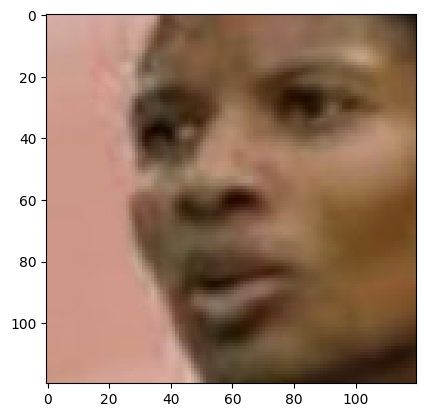

In [63]:
img = cv2.imread(r"F:\ai\Age & Gendder Detection\UTKFace\35_1_1_20170116165647705.jpg.chip.jpg")
img = cv2.resize(img, (120, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = np.array(img)/255
img = img.reshape(1, 120, 120, 3)

age_model.predict(img)[0][0]*100